PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING
Hướng dẫn
1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng 
đầu tiên.
2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat 
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked
3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi 
tách cột xong thì xóa luôn cột Name
4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F
5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa 
ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng 
vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
    a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân 
        phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm 
        hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.
    b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực 
        quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.
6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa 
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult 
và ( age > 60): Older
7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, 
Mrs, Miss, Master ra khỏi “secondName”
8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối 
với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch
9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách 
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.
10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính 
cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu 
thì thay thế bằng “Unknown”
11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện 
(train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.

PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA
Hướng dẫn: Sinh viên cần đưa ra nhận xét sau mỗi biểu đồ trực quan nhằm rút trích được 
thông tin có giá trị về hành khách sống sót dựa trên các đặc trưng bên trên
12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.
13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).
14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác
15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng
16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé
17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và 
cảng sẽ cập bến.

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng 
đầu tiên.

In [443]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

      
filename='D:/Năm 4/kỳ 2/học sau/lab4/titanic_disaster.csv'
def loat_data(filename):
    data=pd.read_csv(filename)
    return data
data=loat_data(filename)
data.head(10)




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [444]:
# 2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat 
# map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked
missing_data = data.isnull().sum()
print(missing_data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


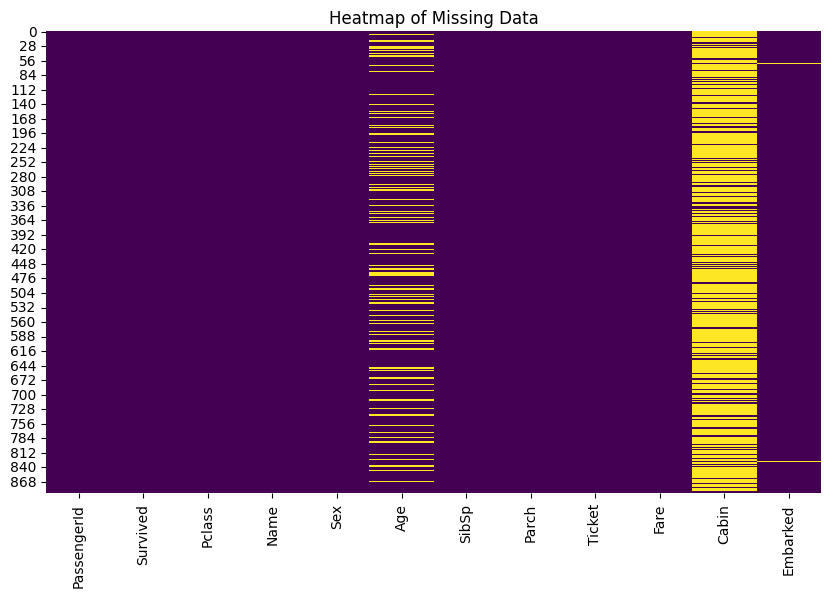

In [445]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

In [446]:
print("Comments on missing data:")
print("Age: {} missing values".format(missing_data['Age']))
print("Cabin: {} missing values".format(missing_data['Cabin']))
print("Embarked: {} missing values".format(missing_data['Embarked']))

Comments on missing data:
Age: 177 missing values
Cabin: 687 missing values
Embarked: 2 missing values


3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi 
tách cột xong thì xóa luôn cột Name

In [447]:
#câu 3:
data[['firstName', 'secondName']]=data['Name'].str.split(',' ,expand=True)
data_splitname=data.drop("Name", axis=1)
data_splitname.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [448]:
#câu 4:
def substitute_Sex(x_df):
    mapping={'male':'M', 'female': 'F'}
    x_df['Sex']=x_df['Sex'].map(mapping)
    return x_df

tidisater5=data_splitname.pipe(substitute_Sex)
tidisater5


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,F,19.0,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,F,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,M,26.0,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa 
ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng 
vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau:

    a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân 
        phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm 
        hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.
 

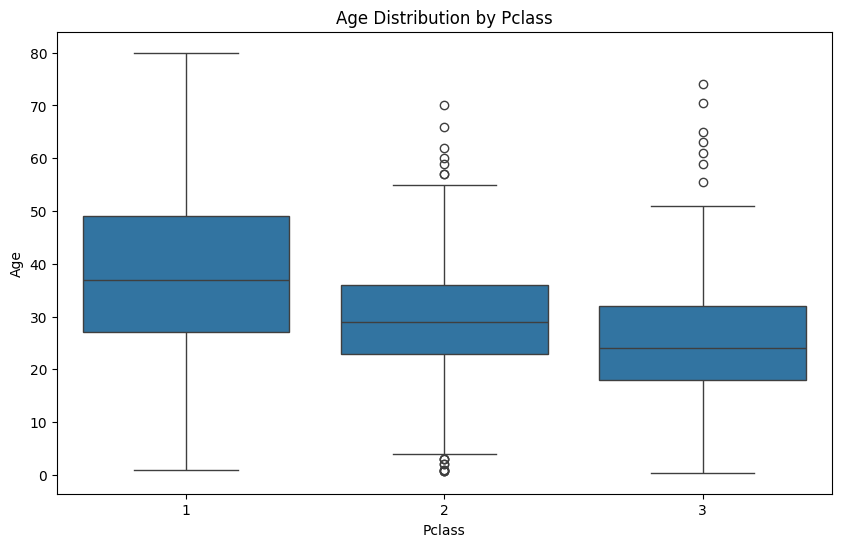

In [449]:
#5.Xử lý thiếu dữ liệu trong cột Age
#a.Vẽ biểu đồ Boxplot để xác định phân phối tuổi theo hạng hành khách.
# Vẽ Box plot để xem phân phối tuổi theo hạng vé (Pclass)
def visualize_age_by_pclass(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Pclass', y='Age', data=tidisater5)
    plt.title('Age Distribution by Pclass')
    plt.show()

# Trực quan hóa phân phối tuổi theo hạng vé
visualize_age_by_pclass(tidisater5)


   b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực 
        quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
firstName        0
secondName       0
dtype: int64


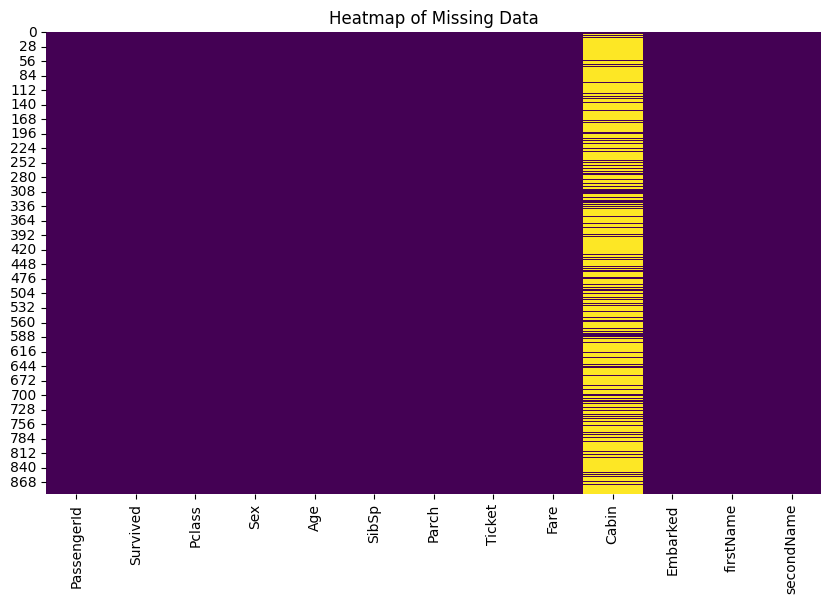

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,M,24.0,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


In [450]:
#câu 5: b) 
# Điền giá trị thiếu cho Age dựa trên từng Pclass
tidisater5.loc[tidisater5['Pclass'] == 1, 'Age'] = tidisater5.loc[tidisater5['Pclass'] == 1, 'Age'].fillna(tidisater5.loc[tidisater5['Pclass'] == 1, 'Age'].median())
tidisater5.loc[tidisater5['Pclass'] == 2, 'Age'] = tidisater5.loc[tidisater5['Pclass'] == 2, 'Age'].fillna(tidisater5.loc[tidisater5['Pclass'] == 2, 'Age'].median())
tidisater5.loc[tidisater5['Pclass'] == 3, 'Age'] = tidisater5.loc[tidisater5['Pclass'] == 3, 'Age'].fillna(tidisater5.loc[tidisater5['Pclass'] == 3, 'Age'].median())

# Nếu vẫn còn NaN, điền bằng median của toàn bộ cột Age
tidisater5['Age'] = tidisater5['Age'].fillna(tidisater5['Age'].median())

# Kiểm tra lại số lượng giá trị thiếu
print(tidisater5.isnull().sum())

# Trực quan hóa dữ liệu thiếu bằng Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tidisater5.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

# Hiển thị kết quả dạng bảng
tidisater5.head(20)

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12 to 18]: Teen, (18 to 60]: Adult và ( age > 60): Older

In [451]:
# Câu 6:
# Định nghĩa hàm tạo biến số Agegroup dựa trên cột Age
def create_agegroup(df):
    # Định nghĩa các mốc phân chia độ tuổi:
    # [0, 12] → Kid, (12, 18] → Teen, (18, 60] → Adult, (60, +∞) → Older
    bins = [0, 12, 18, 60, float('inf')]
    
    # Nhãn cho các nhóm tuổi tương ứng với bins
    labels = ['Kid', 'Teen', 'Adult', 'Older']
    
    # Sử dụng pd.cut() để phân loại tuổi thành nhóm Agegroup
    # right=True nghĩa là bao gồm khoảng bên phải (vd: (12, 18] bao gồm 18)
    df['Agegroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
    
    # Trả về DataFrame sau khi thêm cột Agegroup
    return df

# Áp dụng hàm để tạo biến Agegroup cho DataFrame tidisater5
df = create_agegroup(tidisater5)

# Hiển thị 20 dòng đầu tiên để kiểm tra kết quả
df.head(20)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult
5,6,0,3,M,24.0,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi “secondName”

In [452]:
# Hàm extract_title nhận vào một DataFrame (df)
def extract_title(df):
    # Sử dụng regex để trích xuất các tiền tố trong cột 'secondName' như Mr, Mrs, Miss, Master
    # (\b ... \b) đảm bảo khớp chính xác với từ cần tìm, tránh nhầm lẫn với các từ có ký tự liền trước/sau
    # expand=False để trả về một Series thay vì DataFrame
    df['namePrefix'] = df['secondName'].str.extract(r'(\bMr\b|\bMrs\b|\bMiss\b|\bMaster\b)', expand=False)
    return df

# Gọi hàm extract_title để trích xuất tiền tố và thêm cột 'namePrefix' vào df
df = extract_title(df)

# Thông báo rằng đã chuyển đổi thành công sang các tiền tố như Mr, Mrs, Miss, Master
print('đã chuyển đổi sang mr,ms, master')

# Hiển thị 10 dòng đầu tiên của DataFrame sau khi thêm cột 'namePrefix'
df.head(10)



đã chuyển đổi sang mr,ms, master


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr
5,6,0,3,M,24.0,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Mr
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Mr
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,Master
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,Mrs


In [453]:
# Xóa cột 'secondName' khỏi DataFrame vì đã trích xuất xong tiền tố
drop2ndname = df.drop("secondName", axis=1)

# Thông báo rằng cột 'secondName' đã bị xóa
print('đã xóa 2nd name')

# Hiển thị 10 dòng đầu tiên của DataFrame sau khi xóa cột 'secondName'
drop2ndname.head(10)

đã xóa 2nd name


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,Agegroup,namePrefix
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Adult,Mr
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Adult,Mrs
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Adult,Miss
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Adult,Mrs
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Adult,Mr
5,6,0,3,M,24.0,0,0,330877,8.4583,NaN,Q,Moran,Adult,Mr
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Adult,Mr
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Kid,Master
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Adult,Mrs
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Teen,Mrs


8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [454]:
#câu 8:
def add_family_size(drop2ndname):
    ad['familySize'] = 1 + ad['SibSp'] + ad['Parch']
    return ad

ad = add_family_size(drop2ndname)
ad.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0,Unknown
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0,C
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,0,Unknown
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0,C
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1,0,Unknown
5,6,0,3,M,24.0,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Mr,1,0,Unknown
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Mr,1,0,E
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,Master,5,0,Unknown
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs,3,0,Unknown
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,Mrs,2,0,Unknown


9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách 
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [455]:
# Tạo đặc trưng 'Alone' dựa trên giá trị của 'familySize'
# Nếu familySize = 0 thì Alone = 1 (đi một mình)
# Nếu familySize > 0 thì Alone = 0 (đi cùng nhóm/gia đình)
ad['Alone'] = ad['familySize'].apply(lambda x: 1 if x == 0 else 0) #Sử dụng lambda để kiểm tra từng giá trị của familySize.

# Kiểm tra kết quả sau khi tạo cột 'Alone'
print('Đã tạo cột Alone:')
# in ra màn hình 10 dòng đầu tiên của cột 'familySize' và 'Alone'
print(ad[['familySize', 'Alone']].head(10))

Đã tạo cột Alone:
   familySize  Alone
0           2      0
1           2      0
2           1      0
3           2      0
4           1      0
5           1      0
6           1      0
7           5      0
8           3      0
9           2      0


10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính 
cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu 
thì thay thế bằng “Unknown”

In [ ]:
# Hàm add_type_cabin nhận vào một DataFrame (ad)
def add_type_cabin(ad):
    # Tạo cột 'typeCabin' bằng cách lấy ký tự đầu tiên của 'Cabin'
    # Nếu giá trị trong 'Cabin' không phải NaN, lấy ký tự đầu tiên (x[0])
    # Nếu giá trị là NaN, gán 'Unknown' cho 'typeCabin'
    ad['typeCabin'] = ad['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')
    return ad

# Gọi hàm add_type_cabin để thêm cột 'typeCabin' vào DataFrame
cabin = add_type_cabin(ad)

# Hiển thị 10 dòng đầu tiên của cột 'Cabin' và 'typeCabin' để kiểm tra kết quả
print(cabin[['Cabin', 'typeCabin']].head(10))


#lambda x: x[0] if pd.notna(x) else 'Unknown':
# pd.notna(x): Kiểm tra giá trị x có phải NaN (Not a Number) không.
# Nếu không phải NaN, lấy ký tự đầu tiên bằng x[0]. Ví dụ: "C123" sẽ thành "C".
# Nếu là NaN, gán giá trị là 'Unknown'.

  Cabin typeCabin
0   NaN   Unknown
1   C85         C
2   NaN   Unknown
3  C123         C
4   NaN   Unknown
5   NaN   Unknown
6   E46         E
7   NaN   Unknown
8   NaN   Unknown
9   NaN   Unknown


11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện 
(train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.

In [457]:
#câu 11:
